In [1]:
!pip install textblob

In [2]:
!pip install tweepy

In [3]:
!pip install wordcloud

In [4]:
!pip install regex

In [5]:
!pip install textblob-fr

In [6]:
# Importer les librairies 
import tweepy 
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
# Charger les donn√©es d'authentification Client de l'API Twitter depuis un fichier excel 
log = pd.read_excel("C:/Users/Romual/Desktop/Login.xlsx")

In [8]:
log.columns

Index(['key1', 'key2', 'key3', 'key4'], dtype='object')

In [9]:
# Twitter API Credentials
consumerKey = log.iloc[0,0]
consumerSecret = log.iloc[0,1]
accessToken = log.iloc[0,2]
accessTokenSecret = log.iloc[0,3]

In [10]:
# Cr√©er l'objet d'authentification
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Parametrer le access token et le access token secret
auth.set_access_token(accessToken, accessTokenSecret)

# Cr√©er l'objet API en transmettant les informations d'authentification
api = tweepy.API(auth, wait_on_rate_limit= True)

In [11]:
# Extraire 100 tweets de l'utilisateur Twitter
posts = api.user_timeline(screen_name= "AOuattara_PRCI", count= 100, tweet_mode="extended")

# Afficher les 5 derniers tweets du compte du PR Alassane Ouattara 
print("Afficher les 5 tweets r√©cents: \n")
i=1
for tweet in posts[0:5]:
    print(str(i) + ") "+ tweet.full_text + "\n")
    i= i+1

Afficher les 5 tweets r√©cents: 

1) Pri√®re de la fin du #Ramadan (A√Ød el-Fitr) √† la Grande Mosqu√©e de la Riviera Golf. https://t.co/GiIACOnC4z

2) Ce lundi, j‚Äôai pris part √† la pri√®re de l‚ÄôA√Ød el-Fitr. 

Je souhaite une excellente f√™te de Ramadan √† tous nos fr√®res et s≈ìurs musulmans, dans la paix, la solidarit√© et le bonheur.

Que Dieu b√©nisse notre beau Pays ! https://t.co/HmJUnOUT4r

3) A l‚Äôoccasion de la c√©l√©bration de l‚ÄôA√Ød El Fitr, marquant la fin du je√ªne du mois de Ramadan, je souhaite une tr√®s bonne f√™te √† toute la communaut√© musulmane. https://t.co/gun54ohLgx

4) Je f√©licite les travailleuses et les travailleurs du monde paysan, de la fonction publique et du secteur priv√© dont les efforts et l‚Äôabn√©gation au travail ont permis √† notre pays de r√©aliser des performances √©conomiques et sociales remarquables au cours des 10 derni√®res ann√©es ! https://t.co/xUYqOaRr7q

5) Heureux de regagner Abidjan, ce vendredi, apr√®s un s√©jour en #ArabieSao

In [12]:
# Cr√©er un dataframe avec une colonne appel√©e Tweets dans lequel nous allons ajouter nos tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# Afficher les 5 premi√®res lignes de donn√©es
df.head()

Tweets
0  Pri√®re de la fin du #Ramadan (A√Ød el-Fitr) √† l...
1  Ce lundi, j‚Äôai pris part √† la pri√®re de l‚ÄôA√Ød ...
2  A l‚Äôoccasion de la c√©l√©bration de l‚ÄôA√Ød El Fit...
3  Je f√©licite les travailleuses et les travaille...
4  Heureux de regagner Abidjan, ce vendredi, apr√®...

In [13]:
# Nettoyer le texte pour le pr√©parer √† l'analyse de sentiment

# Cr√©er une fonction pour nettoyer les tweets
def NettoyerTxt(texte):
    texte = re.sub(r'@[A-Za-z0-9]+', '', texte) # Supprimer les @mentions
    texte = re.sub(r'#', '', texte) # Supprimer les symboles '#'
    texte = re.sub(r'RT[\s]+', '', texte) # Supprimer RT
    texte = re.sub(r'https?:\/\/\S+', '', texte) # Supprimer les liens hyper textes
    
    return texte

# Nettoyage du texte
df['Tweets'] = df['Tweets'].apply(NettoyerTxt)

# Afficher le texte nettoy√©
df

Tweets
0   Pri√®re de la fin du Ramadan (A√Ød el-Fitr) √† la...
1   Ce lundi, j‚Äôai pris part √† la pri√®re de l‚ÄôA√Ød ...
2   A l‚Äôoccasion de la c√©l√©bration de l‚ÄôA√Ød El Fit...
3   Je f√©licite les travailleuses et les travaille...
4   Heureux de regagner Abidjan, ce vendredi, apr√®...
..                                                ...
95  Thank you  for our constructive discussion on ...
96  Entretien avec Jutta URPILAINEN, Commissaire e...
97  Nos √©changes ont port√© sur le renforcement de ...
98  J'ai eu un entretien avec la Commissaire europ...
99  Ce mardi, j'ai eu des √©changes fructueux avec ...

[100 rows x 1 columns]

In [14]:
# Enregistrer notre jeu de donn√©es 
df.to_csv('Tweets_Ado.csv')

In [15]:
# Cr√©er une fonction pour obtenir la subjectivit√©
def getSubjectivity(texte):
    return TextBlob(texte,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[1]

# Cr√©er une fonction pour obtenir la polarit√©
def getPolarity(texte):
    return TextBlob(texte,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]

# Cr√©er deux nouvelles colonnes
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Afficher le nouveau dataframe avec les nouvelles colonnes ajout√©es 
df

Tweets  Subjectivity  Polarity
0   Pri√®re de la fin du Ramadan (A√Ød el-Fitr) √† la...      0.175000  0.100000
1   Ce lundi, j‚Äôai pris part √† la pri√®re de l‚ÄôA√Ød ...      0.450000  0.555000
2   A l‚Äôoccasion de la c√©l√©bration de l‚ÄôA√Ød El Fit...      0.416667  0.373333
3   Je f√©licite les travailleuses et les travaille...      0.200000  0.059643
4   Heureux de regagner Abidjan, ce vendredi, apr√®...      0.800000  0.700000
..                                                ...           ...       ...
95  Thank you  for our constructive discussion on ...      0.000000  0.000000
96  Entretien avec Jutta URPILAINEN, Commissaire e...      0.000000  0.175000
97  Nos √©changes ont port√© sur le renforcement de ...      0.000000  0.000000
98  J'ai eu un entretien avec la Commissaire europ...      0.000000  0.175000
99  Ce mardi, j'ai eu des √©changes fructueux avec ...      0.066667  0.033333

[100 rows x 3 columns]

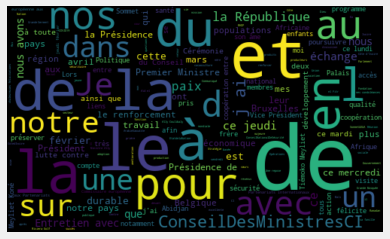

In [16]:
# Tracer le nuage de mots 'word cloud'
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [17]:
# Cr√©er une fonction pour calculer l'analyse n√©gative, neutre et positive
def getAnalysis(score):
    if score < 0:
        return 'Negatif'
    elif score == 0:
        return 'Neutre'
    else:
        return 'Positif'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Afficher le dataframe
df

Tweets  Subjectivity  Polarity  \
0   Pri√®re de la fin du Ramadan (A√Ød el-Fitr) √† la...      0.175000  0.100000   
1   Ce lundi, j‚Äôai pris part √† la pri√®re de l‚ÄôA√Ød ...      0.450000  0.555000   
2   A l‚Äôoccasion de la c√©l√©bration de l‚ÄôA√Ød El Fit...      0.416667  0.373333   
3   Je f√©licite les travailleuses et les travaille...      0.200000  0.059643   
4   Heureux de regagner Abidjan, ce vendredi, apr√®...      0.800000  0.700000   
..                                                ...           ...       ...   
95  Thank you  for our constructive discussion on ...      0.000000  0.000000   
96  Entretien avec Jutta URPILAINEN, Commissaire e...      0.000000  0.175000   
97  Nos √©changes ont port√© sur le renforcement de ...      0.000000  0.000000   
98  J'ai eu un entretien avec la Commissaire europ...      0.000000  0.175000   
99  Ce mardi, j'ai eu des √©changes fructueux avec ...      0.066667  0.033333   

   Analysis  
0   Positif  
1   Positif  
2   Positif  
3   Positif  
4   Positif  
..      ...  
95   Neutre  
96  Positif  
97   Neutre  
98  Positif  
99  Positif  

[100 rows x 4 columns]

In [18]:
# Afficher tous les tweets positifs du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positif'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) Pri√®re de la fin du Ramadan (A√Ød el-Fitr) √† la Grande Mosqu√©e de la Riviera Golf. 

2) Ce lundi, j‚Äôai pris part √† la pri√®re de l‚ÄôA√Ød el-Fitr. 

Je souhaite une excellente f√™te de Ramadan √† tous nos fr√®res et s≈ìurs musulmans, dans la paix, la solidarit√© et le bonheur.

Que Dieu b√©nisse notre beau Pays ! 

3) A l‚Äôoccasion de la c√©l√©bration de l‚ÄôA√Ød El Fitr, marquant la fin du je√ªne du mois de Ramadan, je souhaite une tr√®s bonne f√™te √† toute la communaut√© musulmane. 

4) Je f√©licite les travailleuses et les travailleurs du monde paysan, de la fonction publique et du secteur priv√© dont les efforts et l‚Äôabn√©gation au travail ont permis √† notre pays de r√©aliser des performances √©conomiques et sociales remarquables au cours des 10 derni√®res ann√©es ! 

5) Heureux de regagner Abidjan, ce vendredi, apr√®s un s√©jour en ArabieSaoudite. 

6) : Le taux de couverture √©lectrique en C√¥te d‚ÄôIvoire est pass√© de 33% en 2011, √† plus de 80% en 2020, gr√¢ce au

In [19]:
# Afficher tous les tweets neutres du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutre'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) D√©part pour l‚ÄôArabie Saoudite. 

2) Ma d√©claration √† l‚Äôentame du ConseilDesMinistresCI de ce jeudi 21 avril 2022

 

3) : Communiqu√© de la Pr√©sidence de la R√©publique relatif √† la signature du d√©cret portant nomination des membres du Gouvernem‚Ä¶

4) : Communiqu√© de la Pr√©sidence de la R√©publique 

5) 

6) 

7) Message sur l‚Äô√©tat de la Nation devant le Parlement r√©uni en congr√®s, ce mardi 19 avril 2022, √† la Fondation F√©lix Houphou√´t-Boigny pour la recherche de la paix, √† Yamoussoukro. EtatdelaNation 

8) ùêÑùêßùê≠ùê´ùêûùê≠ùê¢ùêûùêß ùêöùêØùêûùêú , ùêèùê´√©ùê¨ùê¢ùêùùêûùêßùê≠ ùêùùêû ùê•ùêö ùêë√©ùê©ùêÆùêõùê•ùê¢ùê™ùêÆùêû ùê≠ùê®ùê†ùê®ùê•ùêöùê¢ùê¨ùêû, ùêûùêß ùêØùê¢ùê¨ùê¢ùê≠ùêû ùêùùêû ùê≠ùê´ùêöùêØùêöùê¢ùê• ùêûùê≠ ùêù‚Äôùêöùê¶ùê¢ùê≠ùê¢√© ùêûùêß ùêÇ√¥ùê≠ùêû ùêù‚ÄôùêàùêØùê®ùê¢ùê´ùêû, ùêúùêû ùê£ùêûùêÆùêùùê¢ ùüèùüí ùêöùêØùê´ùê¢ùê• ùüêùüéùüêùüê 

9) Entretien avec Patrice Mot

In [20]:
# Afficher tous les tweets negatifs du PR
l = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negatif'):
        print(str(l) + ') ' + sortedDF['Tweets'][i])
        print()
        l = l+1

1) : Entre 2015 et 2020, l‚Äôacc√®s √† l‚Äôeau potable est pass√© de 65% √† 82% sur l‚Äô√©tendue du territoire national. Le PSGouv permet‚Ä¶

2) C√©r√©monie Solennelle de Prestation de Serment du Vice-Pr√©sident de la R√©publique, ce mercredi 20 avril 2022 PrestationdeSermentVP 

3) Suivez, en direct du Palais de la Pr√©sidence de la R√©publique, la C√©r√©monie Solennelle de Prestation de Serment du Vice-pr√©sident, ce mercredi 20 avril 2022



4) Je me f√©licite de l‚Äôadoption, le 30 mars dernier, en ConseilDesMinistresCI, de la Politique et de la Strat√©gie nationale pour une cacaoculture durable bas√©e sur l‚Äôam√©lioration des revenus de nos producteurs, la lutte contre la d√©forestation et le travail des enfants.

5) Le mois de mars a √©t√© marqu√© par le renforcement de nos relations diplomatiques, la diversification de notre √©conomie ainsi que la prise de mesures pour pr√©server le pouvoir d‚Äôachat de nos concitoyens. 

6) Ce vendredi, j'ai pr√©sent√© mes condol√©ances au Min

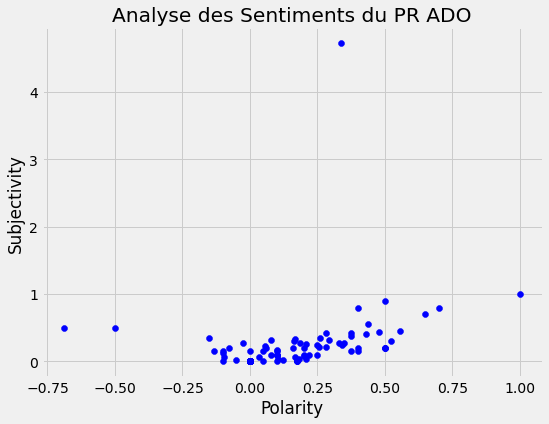

In [21]:
# Tracer la polarit√© et la subjectivit√©
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Analyse des Sentiments du PR ADO')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [22]:
# Obtenir le pourcentage de tweets positifs
tweets_positifs = df[df.Analysis == 'Positif']
tweets_positifs = tweets_positifs['Tweets']

round( (tweets_positifs.shape[0] / df.shape[0]) * 100, 1)

59.0

In [23]:
# Obtenir le pourcentage de tweets neutres 
tweets_neutres = df[df.Analysis == 'Neutre']
tweets_neutres = tweets_neutres['Tweets']

round( (tweets_neutres.shape[0] / df.shape[0]) * 100, 1)

30.0

In [24]:
# Obtenir le pourcentage de tweets n√©gatifs
tweets_negatifs = df[df.Analysis == 'Negatif']
tweets_negatifs = tweets_negatifs['Tweets']

round( (tweets_negatifs.shape[0] / df.shape[0]) * 100, 1)

11.0

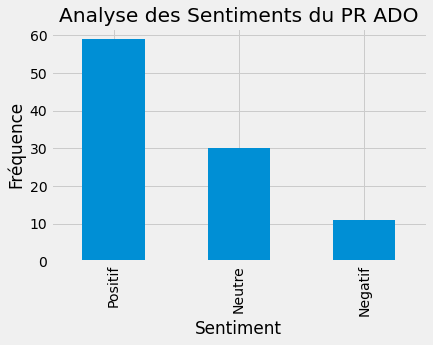

In [25]:
# Afficher les fr√©quences 

df['Analysis'].value_counts()

# Tracer et visualiser les fr√©quences de tweets par sentiment
plt.title('Analyse des Sentiments du PR ADO')
plt.xlabel('Sentiment')
plt.ylabel('Fr√©quence')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()